In [97]:
#using Pkg
#Pkg.add("Plots")
#Pkg.add("DataFrames")
#Pkg.add("CSV")

using Plots
using DataFrames
using CSV

include("src/HydroJulia.jl")
using .HydroJulia

In [98]:
# load a file of example data with missing values
data = CSV.read("test/data/hydromet.csv", missingstrings="-9999")

,date,obs_rain,obs_pet,obs_runoff,BoM_QC,Agency_QC,obs_runoff_sim_0
,Dates…⍰,Float64⍰,Float64⍰,Float64⍰,String⍰,Float64⍰,Float64⍰
1,1951-01-01,1.02667,5.95857,missing,(quality-F),255.0,0.882409
2,1951-01-02,0.00666667,5.97723,missing,(quality-F),255.0,0.804147
3,1951-01-03,0.0,5.99593,missing,(quality-F),255.0,0.769459
4,1951-01-04,0.0933333,6.01459,missing,(quality-F),255.0,0.737057
5,1951-01-05,0.106667,6.03328,missing,(quality-F),255.0,0.706745
6,1951-01-06,0.486667,6.05194,missing,(quality-F),255.0,0.678362
7,1951-01-07,0.0266667,6.07063,missing,(quality-F),255.0,0.65173
8,1951-01-08,21.5267,6.08929,missing,(quality-F),255.0,0.719379
9,1951-01-09,13.18,6.10798,missing,(quality-F),255.0,0.788152


In [99]:
# some summary information of the DF
size(data)

(23376, 7)

In [100]:
names(data)

7-element Array{Symbol,1}:
 :date            
 :obs_rain        
 :obs_pet         
 :obs_runoff      
 :BoM_QC          
 :Agency_QC       
 :obs_runoff_sim_0

In [101]:
describe(data)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Int64,DataType
1,date,,1951-01-01,,2014-12-31,23376,0,Date
2,obs_rain,4.10109,0.0,0.473333,122.76,,0,Float64
3,obs_pet,2.85766,0.30184,2.6623,7.65772,,0,Float64
4,obs_runoff,1.30686,0.031814,0.704825,22.423,,8850,Float64
5,BoM_QC,,(quality-A),,(quality-F),4,0,String
6,Agency_QC,104.659,10.0,10.0,255.0,,0,Float64
7,obs_runoff_sim_0,1.43991,0.0588502,0.771441,21.1078,,0,Float64


In [102]:
typeof(data.obs_runoff)

Array{Union{Missing, Float64},1}

In [103]:
# lets see how the first 10 values look
data[1:10, :]

,date,obs_rain,obs_pet,obs_runoff,BoM_QC,Agency_QC,obs_runoff_sim_0
,Dates…⍰,Float64⍰,Float64⍰,Float64⍰,String⍰,Float64⍰,Float64⍰
1,1951-01-01,1.02667,5.95857,missing,(quality-F),255.0,0.882409
2,1951-01-02,0.00666667,5.97723,missing,(quality-F),255.0,0.804147
3,1951-01-03,0.0,5.99593,missing,(quality-F),255.0,0.769459
4,1951-01-04,0.0933333,6.01459,missing,(quality-F),255.0,0.737057
5,1951-01-05,0.106667,6.03328,missing,(quality-F),255.0,0.706745
6,1951-01-06,0.486667,6.05194,missing,(quality-F),255.0,0.678362
7,1951-01-07,0.0266667,6.07063,missing,(quality-F),255.0,0.65173
8,1951-01-08,21.5267,6.08929,missing,(quality-F),255.0,0.719379
9,1951-01-09,13.18,6.10798,missing,(quality-F),255.0,0.788152


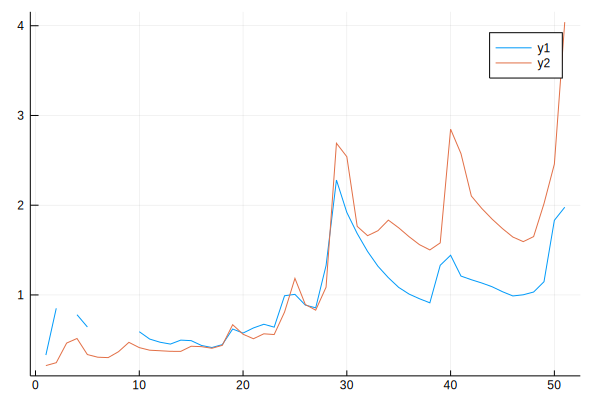

In [104]:
# select a subset of the data
s = 10000
e = s + 50
d = data[s:e, :]

# set a single value missing
d.obs_runoff[3] = missing

# set a few values missing
d[6:9, :obs_runoff] = missing

# plot the obs and sim runoff
plot([d.obs_runoff, d.obs_runoff_sim_0])

In [105]:
# drop any missing values and calculate NSE
dropmissing!(data)
nse(data.obs_runoff, data.obs_runoff_sim_0)

0.874974619696413

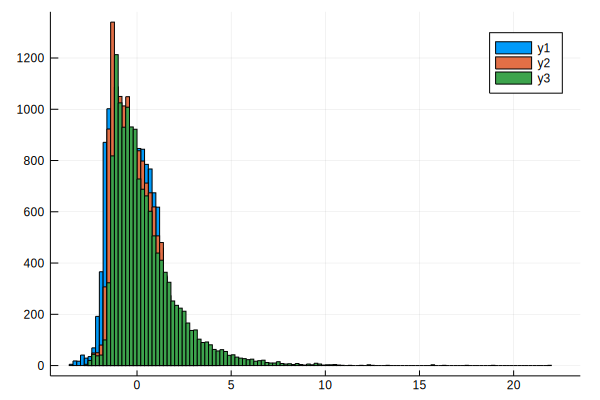

In [106]:
# histogram of log transformed and 1/5 transformed runoff
log_q = boxcox(data.obs_runoff, 0)
bc_q = boxcox(data.obs_runoff, 0.2)
log_sinh_q = log_sinh(data.obs_runoff, 0.004, 1.2)
histogram([log_q, bc_q, log_sinh_q])

In [107]:
sum(boxcox_inverse(log_q, 0) - data.obs_runoff)

4.218847493575595e-15

In [108]:
sum(boxcox_inverse(bc_q, 0.2) - data.obs_runoff)

8.990239108719322e-13

In [109]:
sum(log_sinh_inverse(log_sinh_q, 0.004, 1.2) - data.obs_runoff)

1.1945305855576294e-13

In [110]:
# try the model out
params = Dict("capacity" => 30, "loss" => 2)
one_store_model(50, 5, 4, params)

(30, 17)

In [111]:
# create new dataframe for model input and output and initalise storage to 0
# TODO: fill with missing instead of 0.0 but need to define type to be Float32 somehow
len = nrow(data)
model_output = DataFrame(storage = fill(0.0, len), runoff_sim = fill(0.0, len))
model_data = hcat(data, model_output)

# run model over series
for i in 1:len
    rain = model_data[i, :obs_rain]
    pet = model_data[i, :obs_pet]
    curr_storage = model_data[i, :storage]

    new_storage, runoff = one_store_model(rain, pet, curr_storage, params)

    model_data[i, :runoff_sim] = runoff

    if i < len
        model_data[i + 1, :storage] = new_storage
    end
end

# see how the results look
d = model_data[s:e, [:obs_runoff, :runoff_sim, :obs_runoff_sim_0, :storage]]

,obs_runoff,runoff_sim,obs_runoff_sim_0,storage
,Float64⍰,Float64,Float64⍰,Float64
1,1.0509,0.0,1.30474,8.70302
2,1.1406,0.0,1.29293,6.87318
3,1.2251,0.0,1.3674,6.68915
4,1.0968,0.0,1.33652,10.0176
5,1.0277,0.0,1.28196,8.81193
6,0.99422,0.0,1.23027,5.55207
7,0.99537,0.0,1.1823,2.16472
8,1.2628,0.0,1.2595,0.0
9,1.6571,1.68115,2.66518,3.73099


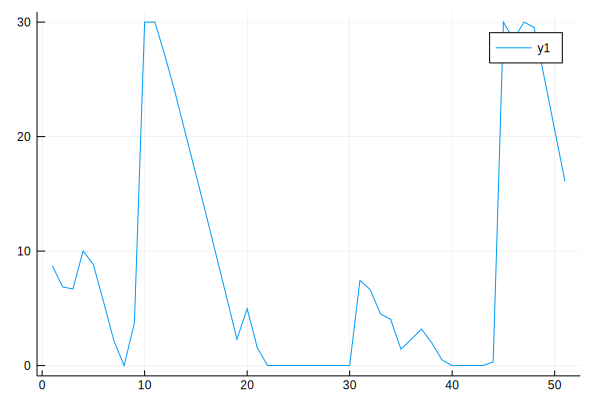

In [112]:
plot(d.storage)

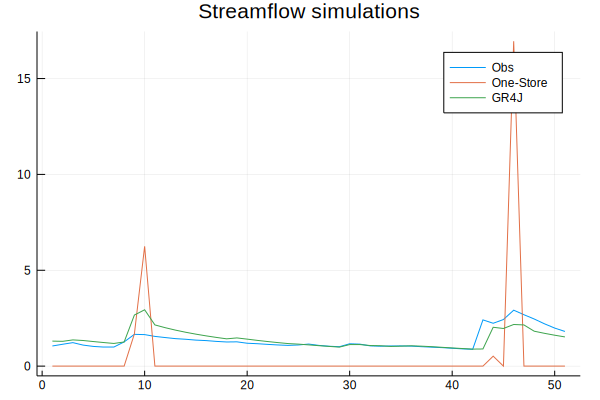

In [113]:
plot([d.obs_runoff, d.runoff_sim, d.obs_runoff_sim_0], title="Streamflow simulations", 
    labels=["Obs", "One-Store", "GR4J"])

## GR4J

In [87]:
# TODO: implement S-curves for UH ordinates
function gr4j_init_state(params)
    n = Int(ceil(x4))
    
    Dict(
        "uh1" => zeros(n), 
        "uh2" => zeros(2n),
        "uh1_ordinates" => collect(1:n),
        "uh2_ordinates" => collect(1:2n),
        "production_store" => 0,
        "routing_store" => 0
    )
end

gr4j_init_state (generic function with 2 methods)

In [85]:
function gr4j_random_parameters()
    Dict(
        "x1" => rand(1:6000), 
        "x2" => rand(-3:0.1:3),
        "x3" => rand(1:1000),
        "x4" => rand(0.1:0.1:14)
    )
end

gr4j_random_parameters (generic function with 1 method)

In [185]:
function gr4j_reasonable_parameters()
    Dict(
        "x1" => 800, 
        "x2" => 2,
        "x3" => 400,
        "x4" => 3
    )
end

gr4j_reasonable_parameters (generic function with 1 method)

In [145]:
function gr4j_run_step(rain, pet, state, params)

    # parameters
    x1 = params["x1"]
    x2 = params["x2"]
    x3 = params["x3"]
    x4 = params["x4"]
    
    # state
    uh1 = state["uh1"]
    uh2 = state["uh2"]    
    production_store = state["production_store"]
    routing_store = state["routing_store"]
    uh1_ordinates = state["uh1_ordinates"]
    uh2_ordinates = state["uh2_ordinates"]     
    
    # effective rainfall        
    if rain > pet
        net_evap = 0
        scaled_net_precip = (rain - pet) / x1 
        scaled_net_precip = scaled_net_precip > 13 ? 13 : scaled_net_precip
        tanh_scaled_net_precip = tanh(scaled_net_precip)
        reservoir_production = (x1 * (1 - (production_store / x1)^2) * tanh_scaled_net_precip) / (1 + production_store / x1 * tanh_scaled_net_precip)
        routing_pattern = rain - pet - reservoir_production
    else
        scaled_net_evap = (pet - rain) / x1
        scaled_net_evap = scaled_net_evap > 13 ? 13 : scaled_net_evap
        tanh_scaled_net_evap = tanh(scaled_net_evap)
        ps_div_x1 = (2 - production_store / x1) * tanh_scaled_net_evap
        net_evap = production_store * (ps_div_x1) / (1 + (1 - production_store / x1) * tanh_scaled_net_evap)
        reservoir_production = 0
        routing_pattern = 0
    end
    
    # production and routing
    production_store = production_store - net_evap + reservoir_production
    percolation = production_store / (1 + (production_store / 2.25 / x1)^4)^0.25
    routing_pattern = routing_pattern + (production_store - percolation)
    production_store = percolation
    
    # TODO: implement unit hydrographs

    # groundwater exchange
    groundwater_exchange = x2 * (routing_store / x3)^3.5
    routing_store = max(0, routing_store + uh1[1] * 0.9 + groundwater_exchange)

    # runoff
    r2 = routing_store / (1 + (routing_store / x3)^4)^0.25
    qr = routing_store - r2
    routing_store = r2
    
    qd = max(0, uh2[1] * 0.1 + groundwater_exchange)
    q = qr + qd   
    
    updated_state = Dict(
        "uh1" => uh1, 
        "uh2" => uh2,
        "uh1_ordinates" => uh1_ordinates,
        "uh2_ordinates" => uh2_ordinates,
        "production_store" => production_store,
        "routing_store" => routing_store
    )
    
    return q, updated_state
end

gr4j_run_step (generic function with 1 method)

In [163]:
params = gr4j_reasonable_parameters()
state = gr4j_init_state(params)

i = 3010
rain = model_data[i, :obs_rain]
pet = model_data[i, :obs_pet]

println("rain=$rain, pet=$pet")
println(params)
println(state)

gr4j_run_step(rain, pet, state, params)

rain=0.24666666666700002, pet=0.3807818659658344
Dict("x1"=>1000,"x4"=>2,"x2"=>2,"x3"=>400)
Dict{String,Any}("uh2"=>[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],"production_store"=>0,"uh2_ordinates"=>[1, 2, 3, 4, 5, 6, 7, 8],"routing_store"=>0,"uh1"=>[0.0, 0.0, 0.0, 0.0],"uh1_ordinates"=>[1, 2, 3, 4])


(0.0, Dict{String,Any}("uh2"=>[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],"production_store"=>0.0,"uh2_ordinates"=>[1, 2, 3, 4, 5, 6, 7, 8],"routing_store"=>0.0,"uh1"=>[0.0, 0.0, 0.0, 0.0],"uh1_ordinates"=>[1, 2, 3, 4]))

In [181]:
# create new dataframe for model input and output and initalise storage to 0
# TODO: fill with missing instead of 0.0 but need to define type to be Float32 somehow
len = nrow(data)
model_output = DataFrame(runoff_sim = fill(0.0, len))
model_data = hcat(data, model_output)

params = gr4j_reasonable_parameters()
curr_state = gr4j_init_state(params)

# run model over series
for i in 1:len
    rain = model_data[i, :obs_rain]
    pet = model_data[i, :obs_pet]

    runoff, new_state = gr4j_run_step(rain, pet, curr_state, params)
    curr_state = new_state
    
    println(runoff, " ", curr_state["production_store"], " ", curr_state["routing_store"])
    
    model_data[i, :runoff_sim] = runoff
end

# see how the results look
d = model_data[s:e, [:obs_runoff, :runoff_sim, :obs_runoff_sim_0]]

0.0 2.0281487741137605 0.0
0.0 2.0170584599830104 0.0
0.0 2.0052840628364423 0.0
0.0 3.7759039348388366 0.0
0.0 3.754043928056872 0.0
0.0 3.7323164894642074 0.0
0.0 3.7211555258457 0.0
0.0 9.241500923486932 0.0
0.0 9.191254277371913 0.0
0.0 9.160241341459338 0.0
0.0 15.389024133271002 0.0
0.0 36.45798617928814 0.0
0.0 50.82174516585348 0.0
0.0 50.6127038415105 0.0
0.0 50.40065200670497 0.0
0.0 50.34178167358698 0.0
0.0 67.8280955474121 0.0
0.0 69.96675878626223 0.0
0.0 69.66977990381902 0.0
0.0 69.38216104735075 0.0
0.0 69.10202564925542 0.0
0.0 68.8301815867804 0.0
0.0 68.56653860227397 0.0
0.0 68.31101792187194 0.0
0.0 68.06353909997311 0.0
0.0 67.82402005902055 0.0
0.0 67.58924481424717 0.0
0.0 67.36003500882387 0.0
0.0 67.134615335208 0.0
0.0 66.99146563254104 0.0
0.0 66.8783472739678 0.0
0.0 66.82870004717249 0.0
0.0 66.62563918070192 0.0
0.0 66.45016256745478 0.0
0.0 66.25079432777686 0.0
0.0 66.07543891809192 0.0
0.0 65.88567100473713 0.0
0.0 65.71550560344487 0.0
0.0 65.6629477

0.0 331.03934958426316 0.0
0.0 332.19682990910746 0.0
0.0 337.7444180094462 0.0
0.0 344.3741737754672 0.0
0.0 347.881906068037 0.0
0.0 347.18219804203346 0.0
0.0 346.38036956857087 0.0
0.0 345.5989288229602 0.0
0.0 349.15717009485985 0.0
0.0 350.7812398684059 0.0
0.0 351.122680460767 0.0
0.0 350.6472214517215 0.0
0.0 350.7241158517457 0.0
0.0 350.18653503967715 0.0
0.0 349.5878248257681 0.0
0.0 348.9474621692216 0.0
0.0 348.4841675250695 0.0
0.0 347.8946511861968 0.0
0.0 347.3553784192683 0.0
0.0 346.8241310142924 0.0
0.0 346.6733987213538 0.0
0.0 356.2801920898098 0.0
0.0 358.1547290255378 0.0
0.0 361.1804389783026 0.0
0.0 361.006450540588 0.0
0.0 360.47590615920967 0.0
0.0 360.27065031669116 0.0
0.0 366.7341356354516 0.0
0.0 375.01450895531724 0.0
0.0 380.6582116125748 0.0
0.0 384.6142664257184 0.0
0.0 384.84476322772423 0.0
0.0 384.34255512130454 0.0
0.0 383.8472038781886 0.0
0.0 383.3628310115931 0.0
0.0 382.8893742600085 0.0
0.0 382.74003872672654 0.0
0.0 398.1550356444861 0.0
0.0

0.0 497.3628967039443 0.0
0.0 505.72651297018314 0.0
0.0 519.9906950377697 0.0
0.0 519.7913460947462 0.0
0.0 521.9367975500926 0.0
0.0 524.2084681320589 0.0
0.0 528.2285044394138 0.0
0.0 532.7418695441991 0.0
0.0 557.3625248238457 0.0
0.0 573.3027687489142 0.0
0.0 592.6028747419093 0.0
0.0 595.4606922691065 0.0
0.0 595.2166359938427 0.0
0.0 594.0395250940014 0.0
0.0 592.8835667189919 0.0
0.0 591.748514545215 0.0
0.0 596.3006707214971 0.0
0.0 598.5581785996623 0.0
0.0 598.9698720876198 0.0
0.0 599.5579670885486 0.0
0.0 600.8997984904743 0.0
0.0 600.9845972369001 0.0
0.0 599.8916343254767 0.0
0.0 599.0920611181115 0.0
0.0 603.0208327607423 0.0
0.0 606.3696298843142 0.0
0.0 617.8333306657089 0.0
0.0 633.2582838587568 0.0
0.0 633.6663147323283 0.0
0.0 632.5642351286921 0.0
0.0 631.2628170479087 0.0
0.0 629.9468398485071 0.0
0.0 628.7933845777807 0.0
0.0 639.4995216056299 0.0
0.0 642.7935659529758 0.0
0.0 641.8273386048953 0.0
0.0 649.9701605647587 0.0
0.0 670.5680706276781 0.0
0.0 683.4166

0.0 657.1188374893562 0.0
0.0 655.2341025671194 0.0
0.0 658.3632390970616 0.0
0.0 664.2860096624458 0.0
0.0 671.9409575899017 0.0
0.0 677.6407082598979 0.0
0.0 684.6405167726001 0.0
0.0 685.3374913339861 0.0
0.0 696.1677520660616 0.0
0.0 699.6617410068827 0.0
0.0 698.3194948010835 0.0
0.0 698.3039636146722 0.0
0.0 700.5956489387182 0.0
0.0 701.7111402471517 0.0
0.0 699.3663196958955 0.0
0.0 697.0711681597363 0.0
0.0 695.4710372078401 0.0
0.0 697.2899225810216 0.0
0.0 698.4217363655315 0.0
0.0 700.9979119249815 0.0
0.0 700.1887281822603 0.0
0.0 697.4250197355248 0.0
0.0 696.6997255730954 0.0
0.0 696.7772455133755 0.0
0.0 694.161140138953 0.0
0.0 691.2751180702775 0.0
0.0 688.3971901739566 0.0
0.0 685.5268593062265 0.0
0.0 682.6636458122716 0.0
0.0 680.8802066222481 0.0
0.0 678.645351037729 0.0
0.0 680.0254139037208 0.0
0.0 684.4412167842395 0.0
0.0 683.4960141715696 0.0
0.0 680.5106850828458 0.0
0.0 677.5215382336659 0.0
0.0 674.8353894272586 0.0
0.0 671.8578295509002 0.0
0.0 669.946530

0.0 649.895741985712 0.0
0.0 647.9670519732739 0.0
0.0 650.8706992714928 0.0
0.0 655.428114238264 0.0
0.0 660.0518499315359 0.0
0.0 665.931177754109 0.0
0.0 668.6675420067268 0.0
0.0 670.23201279602 0.0
0.0 671.0398970714892 0.0
0.0 670.0807788217857 0.0
0.0 685.9511915661235 0.0
0.0 690.9456216068899 0.0
0.0 702.1694931721706 0.0
0.0 701.0358363319191 0.0
0.0 697.685698797779 0.0
0.0 694.3482354300899 0.0
0.0 693.3364618302281 0.0
0.0 691.0800926198143 0.0
0.0 687.6881490248052 0.0
0.0 685.5566837326321 0.0
0.0 682.1133074389426 0.0
0.0 678.6696708788033 0.0
0.0 675.4616801115653 0.0
0.0 672.1018977174335 0.0
0.0 670.7994884682475 0.0
0.0 669.6772432375701 0.0
0.0 666.6893042930748 0.0
0.0 677.4453683872098 0.0
0.0 682.7613278089111 0.0
0.0 687.771279952042 0.0
0.0 684.1871320806354 0.0
0.0 680.3085607246147 0.0
0.0 676.4357336869065 0.0
0.0 672.568010490762 0.0
0.0 675.8133438587857 0.0
0.0 681.9642166474462 0.0
0.0 689.2662182689241 0.0
0.0 694.6823376592657 0.0
0.0 693.083510196828

0.0 418.1823775271354 0.0
0.0 414.55672052813543 0.0
0.0 422.0661409349916 0.0
0.0 423.6733063540682 0.0
0.0 420.1524107588088 0.0
0.0 416.64311066840236 0.0
0.0 413.33319301467014 0.0
0.0 410.10195004853284 0.0
0.0 407.073338964962 0.0
0.0 404.2225213692041 0.0
0.0 400.9955922738769 0.0
0.0 397.8241727656541 0.0
0.0 394.70745960713236 0.0
0.0 391.64034561529513 0.0
0.0 388.6221399688591 0.0
0.0 385.7475487983437 0.0
0.0 382.8245057168819 0.0
0.0 379.9893903594626 0.0
0.0 377.70591893617075 0.0
0.0 375.75063912784657 0.0
0.0 373.6496561602569 0.0
0.0 370.9418873214597 0.0
0.0 368.37025244519646 0.0
0.0 365.7494292606582 0.0
0.0 363.17151060861835 0.0
0.0 360.65168886063816 0.0
0.0 360.06963925576025 0.0
0.0 371.1525355310297 0.0
0.0 368.77665374749733 0.0
0.0 367.58689575109213 0.0
0.0 365.64677590702297 0.0
0.0 363.2551316218141 0.0
0.0 360.9037468974162 0.0
0.0 358.59603757940965 0.0
0.0 356.678858516895 0.0
0.0 360.6246855214065 0.0
0.0 359.00132044219464 0.0
0.0 356.96919914682906 

0.0 340.43970873137323 0.0
0.0 338.0922970934901 0.0
0.0 335.7767871720073 0.0
0.0 333.74098864728495 0.0
0.0 331.61937634092595 0.0
0.0 329.7435787700347 0.0
0.0 328.34424380853216 0.0
0.0 346.0688616428174 0.0
0.0 343.94322884581584 0.0
0.0 342.0058197169404 0.0
0.0 339.81031793517576 0.0
0.0 337.64505527916725 0.0
0.0 335.50968114115017 0.0
0.0 333.40385037877513 0.0
0.0 333.1442447641333 0.0
0.0 331.6623846607948 0.0
0.0 329.69052614780014 0.0
0.0 327.7469528293002 0.0
0.0 325.8458698169848 0.0
0.0 323.98677461625 0.0
0.0 322.1691407068279 0.0
0.0 340.25628100418766 0.0
0.0 339.5500006953339 0.0
0.0 337.9607373706054 0.0
0.0 336.34432915390573 0.0
0.0 334.63060739810857 0.0
0.0 333.6906137934142 0.0
0.0 340.4797652719667 0.0
0.0 341.4267085087611 0.0
0.0 339.87621574885003 0.0
0.0 338.44421784839363 0.0
0.0 337.78367198454015 0.0
0.0 337.40440736209246 0.0
0.0 336.0517539056423 0.0
0.0 334.67779585865384 0.0
0.0 333.3012701157065 0.0
0.0 331.96283551717295 0.0
0.0 330.8129467225884

0.0 612.6696908724089 0.0
0.0 611.0433830571386 0.0
0.0 609.9167633769125 0.0
0.0 609.4482103960773 0.0
0.0 620.2375376494538 0.0
0.0 621.0457713946329 0.0
0.0 620.4772237040901 0.0
0.0 618.6933088081973 0.0
0.0 616.8940354158879 0.0
0.0 615.0907635941328 0.0
0.0 613.283441921806 0.0
0.0 611.9909515052644 0.0
0.0 634.0498544458477 0.0
0.0 636.3615923933926 0.0
0.0 634.448362252729 0.0
0.0 633.8811141609191 0.0
0.0 634.0219555594698 0.0
0.0 632.4552900237717 0.0
0.0 631.7191276123842 0.0
0.0 629.9371671106595 0.0
0.0 634.0186742659213 0.0
0.0 642.1482214700429 0.0
0.0 645.8342858603067 0.0
0.0 648.9316055686548 0.0
0.0 647.9183875289635 0.0
0.0 646.0007718057183 0.0
0.0 648.0295416058251 0.0
0.0 650.7037257700092 0.0
0.0 648.1750163085115 0.0
0.0 665.7485466992358 0.0
0.0 668.7953393834168 0.0
0.0 671.2531661070886 0.0
0.0 673.3801767545391 0.0
0.0 676.5996536861611 0.0
0.0 680.4879236044899 0.0
0.0 683.1850392815612 0.0
0.0 683.514523745387 0.0
0.0 684.9671906376446 0.0
0.0 687.7319687

0.0 712.1442896387509 0.0
0.0 709.0382022466456 0.0
0.0 707.5259736068797 0.0
0.0 711.940927058121 0.0
0.0 712.410956980219 0.0
0.0 712.8984414293013 0.0
0.0 709.8005502052473 0.0
0.0 706.5997935935799 0.0
0.0 703.4236977757621 0.0
0.0 700.2893705675253 0.0
0.0 697.2256146615343 0.0
0.0 701.0071795152446 0.0
0.0 702.626865557019 0.0
0.0 699.9275165057273 0.0
0.0 696.6274925589739 0.0
0.0 693.483435000736 0.0
0.0 692.0170208187268 0.0
0.0 695.3263379967991 0.0
0.0 706.1058635468398 0.0
0.0 708.9878276180904 0.0
0.0 708.4184564594242 0.0
0.0 713.0764778492081 0.0
0.0 713.8504175409425 0.0
0.0 712.6221281894918 0.0
0.0 712.7790961218069 0.0
0.0 713.588572542802 0.0
0.0 714.6211914311832 0.0
0.0 711.0570679194856 0.0
0.0 713.397112993207 0.0
0.0 717.5192365823235 0.0
0.0 713.4872553094875 0.0
0.0 709.2922328171577 0.0
0.0 706.0081943635123 0.0
0.0 709.7593200452209 0.0
0.0 720.9530223175695 0.0
0.0 717.3676749779343 0.0
0.0 712.9047886798654 0.0
0.0 708.4487706192514 0.0
0.0 704.2572618131

0.0 571.9081383229369 0.0
0.0 567.550037544889 0.0
0.0 563.5556241025632 0.0
0.0 561.9388251254558 0.0
0.0 560.2911202897046 0.0
0.0 557.8379782882204 0.0
0.0 553.3550655931343 0.0
0.0 556.8862464318215 0.0
0.0 571.2687163884539 0.0
0.0 573.6062198627857 0.0
0.0 585.2673664640242 0.0
0.0 586.4841347280918 0.0
0.0 591.504444440698 0.0
0.0 587.305894621161 0.0
0.0 582.6276438482078 0.0
0.0 577.6310727600767 0.0
0.0 578.6192935422519 0.0
0.0 583.5689479075266 0.0
0.0 596.604772816944 0.0
0.0 592.006886159011 0.0
0.0 587.0015501136506 0.0
0.0 582.313632402866 0.0
0.0 586.5437260293185 0.0
0.0 592.5873672167095 0.0
0.0 590.0699905382455 0.0
0.0 585.0752030461684 0.0
0.0 581.8410967355964 0.0
0.0 576.958816741194 0.0
0.0 572.3398773425165 0.0
0.0 567.3585811787005 0.0
0.0 562.564042976821 0.0
0.0 565.0867008689871 0.0
0.0 561.4535202431248 0.0
0.0 557.5126935832516 0.0
0.0 555.0621491515045 0.0
0.0 550.2087581139267 0.0
0.0 545.4418224863957 0.0
0.0 540.6967136480026 0.0
0.0 536.014749665786

0.0 575.9007045681647 0.0
0.0 570.849250017436 0.0
0.0 565.9705481425996 0.0
0.0 563.1498559824406 0.0
0.0 558.6265876074515 0.0
0.0 562.4017003389081 0.0
0.0 566.504983309774 0.0
0.0 566.9963553743104 0.0
0.0 564.3495733447056 0.0
0.0 559.4180195369647 0.0
0.0 555.1876416611847 0.0
0.0 550.4476228464986 0.0
0.0 545.5187481970729 0.0
0.0 540.6982837797774 0.0
0.0 536.4951277201675 0.0
0.0 531.974030870866 0.0
0.0 527.1721297650911 0.0
0.0 522.4029474369501 0.0
0.0 517.7049712984594 0.0
0.0 513.0768921591881 0.0
0.0 508.51744542321194 0.0
0.0 504.02540861775526 0.0
0.0 499.61953604072363 0.0
0.0 495.4122818445148 0.0
0.0 491.63172383757814 0.0
0.0 487.5148039841002 0.0
0.0 483.3362580049688 0.0
0.0 479.41746045130674 0.0
0.0 475.9660148426286 0.0
0.0 471.96107515921085 0.0
0.0 468.0238675332448 0.0
0.0 464.1343484664625 0.0
0.0 460.73994972630527 0.0
0.0 456.95902443046197 0.0
0.0 453.2328410583988 0.0
0.0 449.56057665058034 0.0
0.0 445.94142848578014 0.0
0.0 442.3883723996192 0.0
0.0 4

0.0 444.0529127695947 0.0
0.0 453.1889177820181 0.0
0.0 455.00724955434066 0.0
0.0 454.4258397398253 0.0
0.0 453.7696705644401 0.0
0.0 453.1324079243314 0.0
0.0 452.5092759618504 0.0
0.0 451.91419604413034 0.0
0.0 451.3563189914582 0.0
0.0 463.4619176476032 0.0
0.0 488.8682773356609 0.0
0.0 533.7232285451552 0.0
0.0 539.84190913285 0.0
0.0 539.6254796414646 0.0
0.0 539.3472442078937 0.0
0.0 549.7748436475752 0.0
0.0 550.3865048920977 0.0
0.0 550.6232272628826 0.0
0.0 559.5436634319079 0.0
0.0 560.0155050376608 0.0
0.0 559.1659836717913 0.0
0.0 558.3077585890527 0.0
0.0 557.4515778790833 0.0
0.0 567.6516669760704 0.0
0.0 567.9122297281788 0.0
0.0 573.924339419997 0.0
0.0 575.3684580073156 0.0
0.0 574.5231988114587 0.0
0.0 573.7617124282493 0.0
0.0 572.9043176903601 0.0
0.0 571.9517196667535 0.0
0.0 571.01290736448 0.0
0.0 573.987730113595 0.0
0.0 576.6526213914735 0.0
0.0 577.9644554533445 0.0
0.0 577.7514115527144 0.0
0.0 576.8823756920284 0.0
0.0 575.9288001817961 0.0
0.0 574.94023490

0.0 612.3425294019341 0.0
0.0 612.2666886516594 0.0
0.0 611.7846305767175 0.0
0.0 610.6604520635881 0.0
0.0 609.5081966812639 0.0
0.0 608.4178503926457 0.0
0.0 607.6116054774351 0.0
0.0 606.8842121161031 0.0
0.0 616.8164755426129 0.0
0.0 620.83235323706 0.0
0.0 622.7279534972774 0.0
0.0 626.2016528548473 0.0
0.0 627.275160184252 0.0
0.0 629.0571866759167 0.0
0.0 631.1595167779383 0.0
0.0 630.1427445710556 0.0
0.0 635.0824494183889 0.0
0.0 645.5975873423846 0.0
0.0 646.8121167245677 0.0
0.0 645.5375881379113 0.0
0.0 644.1676255352736 0.0
0.0 642.7378188358199 0.0
0.0 641.2576550996241 0.0
0.0 641.0842228485932 0.0
0.0 642.6045622128044 0.0
0.0 645.2180366451067 0.0
0.0 645.594440920994 0.0
0.0 648.8125914299005 0.0
0.0 648.2962320537712 0.0
0.0 646.9066470707812 0.0
0.0 646.1414874272831 0.0
0.0 645.5993605386891 0.0
0.0 643.9467711789989 0.0
0.0 642.2864816071635 0.0
0.0 640.6357402053085 0.0
0.0 650.4650315838551 0.0
0.0 658.6376187961898 0.0
0.0 660.4054377742162 0.0
0.0 675.75939524

0.0 607.7398393242263 0.0
0.0 602.9007640691998 0.0
0.0 598.0909416643017 0.0
0.0 593.3095167482115 0.0
0.0 596.2247156486709 0.0
0.0 597.000677092607 0.0
0.0 592.1712429838983 0.0
0.0 589.1600755416853 0.0
0.0 584.4017724718356 0.0
0.0 579.6372818253752 0.0
0.0 574.8991437237478 0.0
0.0 570.1867156260621 0.0
0.0 565.4993391287309 0.0
0.0 560.8364190048197 0.0
0.0 567.622245951831 0.0
0.0 563.6429026699233 0.0
0.0 558.9401965565594 0.0
0.0 554.2618955605321 0.0
0.0 549.7980348618623 0.0
0.0 545.1915612568589 0.0
0.0 540.6757913856592 0.0
0.0 549.7663748938148 0.0
0.0 550.7369369301709 0.0
0.0 547.086578219832 0.0
0.0 542.694878949826 0.0
0.0 538.0248010456552 0.0
0.0 533.3676390313417 0.0
0.0 528.7431014576231 0.0
0.0 524.1557284966799 0.0
0.0 519.8247556122338 0.0
0.0 517.1509137798778 0.0
0.0 529.1078667846991 0.0
0.0 525.2594239722579 0.0
0.0 521.0176511698469 0.0
0.0 522.5710327475172 0.0
0.0 521.0082554800736 0.0
0.0 516.4142723236588 0.0
0.0 511.8517097004839 0.0
0.0 507.32008121

0.0 547.3251691755838 0.0
0.0 549.3576854613382 0.0
0.0 550.5226973806896 0.0
0.0 546.8206651995888 0.0
0.0 545.6473414769122 0.0
0.0 541.0856041882686 0.0
0.0 536.5322239838092 0.0
0.0 532.0182174859744 0.0
0.0 527.542864455021 0.0
0.0 523.1208777672682 0.0
0.0 518.7206609904789 0.0
0.0 514.357092034768 0.0
0.0 510.2064180131504 0.0
0.0 505.91795575876347 0.0
0.0 530.6518439025124 0.0
0.0 548.2866271610162 0.0
0.0 544.8202794530488 0.0
0.0 540.3366428717251 0.0
0.0 536.0635908424281 0.0
0.0 543.313008549152 0.0
0.0 545.1860076709 0.0
0.0 541.0058264794781 0.0
0.0 536.4427930716646 0.0
0.0 532.7601534497015 0.0
0.0 529.2553603204157 0.0
0.0 526.7244452422059 0.0
0.0 522.5192017981146 0.0
0.0 518.8535763094624 0.0
0.0 514.7474306856934 0.0
0.0 510.405973595329 0.0
0.0 506.4666000028738 0.0
0.0 502.72199074687154 0.0
0.0 498.52152535586646 0.0
0.0 494.34908868186795 0.0
0.0 490.219060919289 0.0
0.0 486.1307662066961 0.0
0.0 482.667915215138 0.0
0.0 478.6566589257674 0.0
0.0 474.685396872

0.0 544.4150288030426 0.0
0.0 541.787776249967 0.0
0.0 539.1730484551962 0.0
0.0 537.1393961647226 0.0
0.0 539.9211803833084 0.0
0.0 540.3899465702647 0.0
0.0 538.5275903024204 0.0
0.0 541.878858699528 0.0
0.0 539.3278874498104 0.0
0.0 536.80426912076 0.0
0.0 535.327950274679 0.0
0.0 533.7815927434677 0.0
0.0 546.8551653872411 0.0
0.0 549.5032728306898 0.0
0.0 547.7902226264237 0.0
0.0 545.3493738145587 0.0
0.0 543.9288335319438 0.0
0.0 543.4409582005427 0.0
0.0 541.0553344623127 0.0
0.0 538.643341131197 0.0
0.0 537.6246554384317 0.0
0.0 535.4068457648269 0.0
0.0 533.11444452711 0.0
0.0 535.1558271084917 0.0
0.0 532.8239368136972 0.0
0.0 530.5118602722388 0.0
0.0 528.2606432633818 0.0
0.0 526.3529786329397 0.0
0.0 525.3308150891626 0.0
0.0 535.8775785926413 0.0
0.0 533.6727068996479 0.0
0.0 531.479790516393 0.0
0.0 529.2986205331766 0.0
0.0 527.1651320542959 0.0
0.0 525.0787581084463 0.0
0.0 523.0389483406253 0.0
0.0 521.1271129360349 0.0
0.0 519.1784185640124 0.0
0.0 517.2747409642288

0.0 496.83910478558806 0.0
0.0 495.0642064087047 0.0
0.0 493.3232782774295 0.0
0.0 491.6159777435217 0.0
0.0 499.2834692859126 0.0
0.0 497.78202413834606 0.0
0.0 497.31095760533634 0.0
0.0 495.80971586745625 0.0
0.0 494.21687487448725 0.0
0.0 492.6566826208241 0.0
0.0 491.1386904235016 0.0
0.0 489.64284372755014 0.0
0.0 488.1787539769162 0.0
0.0 486.7461384838604 0.0
0.0 485.4425164099296 0.0
0.0 484.2668505324981 0.0
0.0 482.9257876009573 0.0
0.0 481.6151603666025 0.0
0.0 480.5338194877751 0.0
0.0 480.1654531644579 0.0
0.0 478.94039460823166 0.0
0.0 477.78359404453175 0.0
0.0 476.6172712734233 0.0
0.0 475.48006026000456 0.0
0.0 474.82927325888204 0.0
0.0 474.46505021550706 0.0
0.0 473.60198976214696 0.0
0.0 472.9200987169162 0.0
0.0 473.1775333724463 0.0
0.0 472.25797593142573 0.0
0.0 478.4968735345941 0.0
0.0 478.85140279897973 0.0
0.0 478.09542907423764 0.0
0.0 477.1759445953002 0.0
0.0 491.6974558726522 0.0
0.0 508.1113783175469 0.0
0.0 513.7857363071763 0.0
0.0 513.3450609306136 0

0.0 674.1124269453851 0.0
0.0 670.9141396889112 0.0
0.0 669.8254804968997 0.0
0.0 666.6269961657979 0.0
0.0 663.4455195931496 0.0
0.0 660.7366491130579 0.0
0.0 664.0046892363466 0.0
0.0 660.7847484336091 0.0
0.0 657.5684646942427 0.0
0.0 654.4660942127211 0.0
0.0 656.4019830847295 0.0
0.0 653.5761925439684 0.0
0.0 653.6489776915172 0.0
0.0 652.4110820866863 0.0
0.0 649.6090918735676 0.0
0.0 657.8102534051884 0.0
0.0 659.7934103831593 0.0
0.0 656.9581696405108 0.0
0.0 653.4868161657091 0.0
0.0 650.0099618320017 0.0
0.0 646.5388873803503 0.0
0.0 643.0731581367374 0.0
0.0 639.7159588008477 0.0
0.0 637.597417255648 0.0
0.0 638.3181959399069 0.0
0.0 637.7511254027866 0.0
0.0 638.6789306102969 0.0
0.0 639.5396230220623 0.0
0.0 635.9956071232443 0.0
0.0 639.343125549848 0.0
0.0 635.780702075711 0.0
0.0 632.1205970833134 0.0
0.0 630.6089054566245 0.0
0.0 636.0930057715531 0.0
0.0 637.8590131450683 0.0
0.0 642.230517563925 0.0
0.0 638.9458104797372 0.0
0.0 635.1615273287521 0.0
0.0 631.34872302

0.0 756.6538646318211 0.0
0.0 751.4264917651446 0.0
0.0 745.9744744447773 0.0
0.0 740.5586983311105 0.0
0.0 735.1767572317389 0.0
0.0 729.8264111003489 0.0
0.0 728.7247828272459 0.0
0.0 724.4621677592748 0.0
0.0 719.2068804617494 0.0
0.0 713.885642008436 0.0
0.0 708.63315966037 0.0
0.0 711.6514154232477 0.0
0.0 706.4130769322767 0.0
0.0 701.2399996885831 0.0
0.0 704.6781129279314 0.0
0.0 699.637399703729 0.0
0.0 698.7638664317049 0.0
0.0 693.6606700731103 0.0
0.0 688.6172993161773 0.0
0.0 683.6315704486051 0.0
0.0 679.3293677835146 0.0
0.0 674.4450075870042 0.0
0.0 669.6362907599813 0.0
0.0 664.8540489853347 0.0
0.0 660.9159333965722 0.0
0.0 656.3308750538305 0.0
0.0 651.6795816171093 0.0
0.0 647.0726740734726 0.0
0.0 643.9928713556095 0.0
0.0 659.6381270255066 0.0
0.0 655.3973680430834 0.0
0.0 650.7773519815834 0.0
0.0 646.1374471972289 0.0
0.0 641.54088245381 0.0
0.0 637.1587649209272 0.0
0.0 638.1043834634237 0.0
0.0 636.9386483791558 0.0
0.0 636.4877821353621 0.0
0.0 633.0875225375

0.0 325.8344974764356 0.0
0.0 323.2319030781159 0.0
0.0 320.1077086647391 0.0
0.0 322.2956785643835 0.0
0.0 325.8704589743579 0.0
0.0 329.0092957697662 0.0
0.0 325.77612276232145 0.0
0.0 322.5826650417267 0.0
0.0 319.4284245833922 0.0
0.0 316.31294517618534 0.0
0.0 313.2357414512246 0.0
0.0 310.19636898101436 0.0
0.0 307.2255456235558 0.0
0.0 304.6042011349045 0.0
0.0 301.67249856372405 0.0
0.0 300.0765728751652 0.0
0.0 306.40775238502744 0.0
0.0 306.8204129348212 0.0
0.0 304.45484465871834 0.0
0.0 302.12386614004816 0.0
0.0 299.2838896016959 0.0
0.0 296.47864054399275 0.0
0.0 293.7076861443218 0.0
0.0 290.9706317656559 0.0
0.0 289.0143816079146 0.0
0.0 286.33792997060675 0.0
0.0 283.69423357052193 0.0
0.0 281.6436718965572 0.0
0.0 279.05984943437153 0.0
0.0 305.70288001581883 0.0
0.0 303.2282337416347 0.0
0.0 300.51041906654865 0.0
0.0 297.82540248386164 0.0
0.0 295.4143470233727 0.0
0.0 292.81188951720185 0.0
0.0 290.2209551911999 0.0
0.0 287.6612957287483 0.0
0.0 293.6865071039585 0

0.0 384.33000180942827 0.0
0.0 381.1703987272624 0.0
0.0 378.04878097818005 0.0
0.0 395.8474214102764 0.0
0.0 395.3458220115345 0.0
0.0 392.2337311363781 0.0
0.0 389.29254034112216 0.0
0.0 386.4197168584824 0.0
0.0 383.64315837666146 0.0
0.0 386.03896899552814 0.0
0.0 385.57533657973613 0.0
0.0 382.7477031638884 0.0
0.0 379.955306878775 0.0
0.0 377.1976971021055 0.0
0.0 383.5115588800976 0.0
0.0 383.86023181538394 0.0
0.0 381.12847017481823 0.0
0.0 378.43078405080166 0.0
0.0 375.7667622882006 0.0
0.0 373.13600064564235 0.0
0.0 370.8076745789521 0.0
0.0 368.9696904053537 0.0
0.0 366.7494311466094 0.0
0.0 364.2438790125162 0.0
0.0 361.7657663585877 0.0
0.0 360.4512206362471 0.0
0.0 361.5621358123645 0.0
0.0 370.88595832150986 0.0
0.0 368.4821009057371 0.0
0.0 366.06073081376053 0.0
0.0 363.66983043129113 0.0
0.0 363.1309667594131 0.0
0.0 361.1915885557423 0.0
0.0 358.88920461471014 0.0
0.0 356.6042339069794 0.0
0.0 354.34818285310644 0.0
0.0 352.120743452091 0.0
0.0 349.9523511029632 0.0

0.0 592.4690181141688 0.0
0.0 591.3600995876596 0.0
0.0 590.2696158494173 0.0
0.0 594.3742769906017 0.0
0.0 598.6641903055441 0.0
0.0 598.0824794087246 0.0
0.0 597.0836085340732 0.0
0.0 599.6487869567267 0.0
0.0 601.0553092694205 0.0
0.0 599.8879407760268 0.0
0.0 599.7615511702296 0.0
0.0 598.7426230672877 0.0
0.0 600.0581595134718 0.0
0.0 599.9153647026914 0.0
0.0 598.693195324829 0.0
0.0 597.6196770687064 0.0
0.0 602.6122623713094 0.0
0.0 616.1958399056723 0.0
0.0 628.0898616319795 0.0
0.0 627.8267949067141 0.0
0.0 627.767318895609 0.0
0.0 626.8564897449969 0.0
0.0 629.0521249483699 0.0
0.0 643.993890825666 0.0
0.0 654.8703250012635 0.0
0.0 656.3163768278419 0.0
0.0 654.7235443784616 0.0
0.0 652.7398771519249 0.0
0.0 650.7940300316058 0.0
0.0 648.8041759674024 0.0
0.0 646.8228270089775 0.0
0.0 644.838201326418 0.0
0.0 643.1099788757759 0.0
0.0 641.1161378640513 0.0
0.0 639.1532773690869 0.0
0.0 637.1404278945818 0.0
0.0 641.7362737358013 0.0
0.0 651.2934416374085 0.0
0.0 653.84195584

0.0 507.8023730729015 0.0
0.0 506.8049446728522 0.0
0.0 524.5623266525232 0.0
0.0 529.0362308286616 0.0
0.0 527.916256977353 0.0
0.0 526.817177652683 0.0
0.0 534.5694379429923 0.0
0.0 541.9109030787422 0.0
0.0 544.3588942779355 0.0
0.0 550.7483675219123 0.0
0.0 551.1126803758876 0.0
0.0 549.8636792752251 0.0
0.0 548.589813221125 0.0
0.0 547.3176293166276 0.0
0.0 546.0471106314053 0.0
0.0 544.7781889044986 0.0
0.0 543.5108487335625 0.0
0.0 542.4405621815979 0.0
0.0 557.6511971307732 0.0
0.0 570.747158262344 0.0
0.0 575.3572579712885 0.0
0.0 591.862993039211 0.0
0.0 598.6448235499569 0.0
0.0 620.6064584407846 0.0
0.0 628.5299565405755 0.0
0.0 626.7467095404293 0.0
0.0 624.5017319649575 0.0
0.0 622.3342242045284 0.0
0.0 623.8991955066115 0.0
0.0 623.9396426413213 0.0
0.0 622.5595567170159 0.0
0.0 620.267336237455 0.0
0.0 617.8149030360844 0.0
0.0 615.5484809397115 0.0
0.0 615.2605637245047 0.0
0.0 617.0265561594371 0.0
0.0 619.3424603559064 0.0
0.0 619.9673502239373 0.0
0.0 617.2895899923

0.0 435.2869465109911 0.0
0.0 430.84156578392464 0.0
0.0 426.4416171881118 0.0
0.0 422.03333124869766 0.0
0.0 417.64388094047143 0.0
0.0 413.27336229524525 0.0
0.0 408.92192391731373 0.0
0.0 406.6223269305157 0.0
0.0 403.3321804419798 0.0
0.0 423.69790832433137 0.0
0.0 420.0325593127633 0.0
0.0 415.51943131079827 0.0
0.0 411.02752750200546 0.0
0.0 406.5569927985315 0.0
0.0 402.10793821690066 0.0
0.0 397.6805256939484 0.0
0.0 393.5863963784057 0.0
0.0 389.52556887763996 0.0
0.0 385.15797527704626 0.0
0.0 380.81268376109256 0.0
0.0 376.48984710231883 0.0
0.0 372.1896636747045 0.0
0.0 367.9122963000296 0.0
0.0 363.6579516802449 0.0
0.0 359.4840074462952 0.0
0.0 355.3890903368783 0.0
0.0 351.3718342702004 0.0
0.0 347.4308805326978 0.0
0.0 343.56493403331234 0.0
0.0 339.77270546186304 0.0
0.0 336.0529115709134 0.0
0.0 332.4043300593978 0.0
0.0 328.825743335837 0.0
0.0 325.31593885916436 0.0
0.0 321.87376267982455 0.0
0.0 320.1467511426427 0.0
0.0 316.82181103962233 0.0
0.0 313.5613566852249

0.0 424.9373961446442 0.0
0.0 421.2256091736853 0.0
0.0 417.05842093656804 0.0
0.0 412.9439608611797 0.0
0.0 408.88150435292084 0.0
0.0 404.87036379194285 0.0
0.0 400.9098238921535 0.0
0.0 397.0246352752473 0.0
0.0 393.30194702902156 0.0
0.0 389.5170926835622 0.0
0.0 385.8088188486685 0.0
0.0 384.25161333122503 0.0
0.0 388.82615945350466 0.0
0.0 391.2236885275991 0.0
0.0 398.67572370882885 0.0
0.0 395.38153015010283 0.0
0.0 392.88411028980585 0.0
0.0 389.2929007076954 0.0
0.0 385.6592133211709 0.0
0.0 382.0708760542607 0.0
0.0 378.5763444265344 0.0
0.0 375.0765490175664 0.0
0.0 371.6445462564316 0.0
0.0 368.2352183577651 0.0
0.0 372.57322248111666 0.0
0.0 371.9636706183822 0.0
0.0 368.6392897880044 0.0
0.0 365.31235333207894 0.0
0.0 362.14920463353667 0.0
0.0 358.9295762719123 0.0
0.0 355.7212699807292 0.0
0.0 352.55147236329606 0.0
0.0 349.419734752773 0.0
0.0 346.3255962072441 0.0
0.0 343.28374103280316 0.0
0.0 341.427627969053 0.0
0.0 338.5958552032964 0.0
0.0 335.64136779562284 0.0

0.0 395.29152849636125 0.0
0.0 394.3000930498271 0.0
0.0 392.9889477602117 0.0
0.0 391.69633976197633 0.0
0.0 390.43469938274507 0.0
0.0 389.21630656900635 0.0
0.0 388.0283034227348 0.0
0.0 386.8580087761341 0.0
0.0 385.717712741211 0.0
0.0 384.6072133623982 0.0
0.0 383.52629402676587 0.0
0.0 382.4747236295979 0.0
0.0 381.4523175188262 0.0
0.0 380.45887630048395 0.0
0.0 379.49828231602885 0.0
0.0 378.57549359024284 0.0
0.0 377.7923167318586 0.0
0.0 376.88711677776513 0.0
0.0 376.0111451594184 0.0
0.0 375.1317407355905 0.0
0.0 374.2692122704741 0.0
0.0 373.48818097113207 0.0
0.0 372.6669818943507 0.0
0.0 378.3292377142916 0.0
0.0 378.8674944959496 0.0
0.0 381.7090474244107 0.0
0.0 384.08954175868524 0.0
0.0 385.2924128824902 0.0
0.0 388.5444435540251 0.0
0.0 388.2019694473684 0.0
0.0 388.84052630830837 0.0
0.0 388.156532397778 0.0
0.0 387.4391033805604 0.0
0.0 386.8006118697314 0.0
0.0 386.17842006908506 0.0
0.0 385.51026576956826 0.0
0.0 384.88331359934557 0.0
0.0 384.24774769107665 0.

0.0 482.3604089282646 0.0
0.0 483.04799820998903 0.0
0.0 482.5769968548329 0.0
0.0 481.9913867818753 0.0
0.0 481.36466342291317 0.0
0.0 481.8706992513222 0.0
0.0 481.5863793001404 0.0
0.0 480.90022197416096 0.0
0.0 480.2413583115527 0.0
0.0 479.5756936258436 0.0
0.0 478.9323316569241 0.0
0.0 478.29181505245396 0.0
0.0 477.6637755111141 0.0
0.0 477.0626466642746 0.0
0.0 477.5506242671597 0.0
0.0 478.2018779273285 0.0
0.0 477.64993334734714 0.0
0.0 477.03277777535243 0.0
0.0 476.59219298762304 0.0
0.0 477.86822708768983 0.0
0.0 477.6548577694015 0.0
0.0 477.01764471937474 0.0
0.0 476.428567134148 0.0
0.0 475.8536212580592 0.0
0.0 475.2252492925865 0.0
0.0 474.587024782644 0.0
0.0 482.8906588662442 0.0
0.0 487.395831021289 0.0
0.0 490.53285543258545 0.0
0.0 490.0188876935374 0.0
0.0 489.40603426945404 0.0
0.0 489.2937988205274 0.0
0.0 488.65932913703904 0.0
0.0 488.1916574272015 0.0
0.0 491.30462707300853 0.0
0.0 497.03402438387565 0.0
0.0 498.1421301343874 0.0
0.0 497.665693807374 0.0
0.

0.0 560.681746458102 0.0
0.0 559.732525568354 0.0
0.0 557.4417942588689 0.0
0.0 553.6760177923529 0.0
0.0 551.117063308895 0.0
0.0 547.2279551319973 0.0
0.0 543.3389201172491 0.0
0.0 539.5231701850591 0.0
0.0 540.2596017435205 0.0
0.0 537.7470191611291 0.0
0.0 568.118522692521 0.0
0.0 576.8074373956847 0.0
0.0 572.6226969380739 0.0
0.0 568.2913607879112 0.0
0.0 563.9771648297691 0.0
0.0 559.6689733226157 0.0
0.0 557.3823286232819 0.0
0.0 554.455813978407 0.0
0.0 550.1244139263099 0.0
0.0 545.7988851222519 0.0
0.0 541.4790750387522 0.0
0.0 537.1648519855804 0.0
0.0 532.872971436312 0.0
0.0 528.603054836678 0.0
0.0 525.7853827565311 0.0
0.0 523.4959393768299 0.0
0.0 519.2617798960555 0.0
0.0 516.3561355360722 0.0
0.0 528.4434773383115 0.0
0.0 524.7423252316728 0.0
0.0 520.4410751797777 0.0
0.0 516.1617134669918 0.0
0.0 511.90388023248397 0.0
0.0 507.6672859811366 0.0
0.0 505.8347101463912 0.0
0.0 503.5666470304553 0.0
0.0 509.31917364759823 0.0
0.0 505.0933979081024 0.0
0.0 500.843464959

0.0 511.02406100062507 0.0
0.0 527.0141154522141 0.0
0.0 527.126401220131 0.0
0.0 538.1904349964232 0.0
0.0 560.757764654871 0.0
0.0 558.0627571209399 0.0
0.0 554.1269088858762 0.0
0.0 550.1990936521144 0.0
0.0 546.4953836352908 0.0
0.0 545.0058708096631 0.0
0.0 549.2689613089733 0.0
0.0 545.9681872198204 0.0
0.0 545.8379567831081 0.0
0.0 541.8314619123023 0.0
0.0 538.0948125874354 0.0
0.0 534.4153898872877 0.0
0.0 531.9017375751133 0.0
0.0 527.9173616524031 0.0
0.0 526.3394705090252 0.0
0.0 522.3468857907167 0.0
0.0 518.3624976220625 0.0
0.0 518.5007629335187 0.0
0.0 514.5098616042727 0.0
0.0 510.51705043001806 0.0
0.0 541.5793623496543 0.0
0.0 548.6246649605308 0.0
0.0 547.1966060028195 0.0
0.0 542.8796699837467 0.0
0.0 540.8382878855147 0.0
0.0 541.8937460327869 0.0
0.0 546.3927505200925 0.0
0.0 544.1236054992345 0.0
0.0 539.3929472353736 0.0
0.0 534.6351218101936 0.0
0.0 529.9335162386956 0.0
0.0 525.2150445753533 0.0
0.0 520.3777729554117 0.0
0.0 515.5158886372877 0.0
0.0 511.4596

0.0 424.20723249969046 0.0
0.0 422.0523876093775 0.0
0.0 419.94501056198766 0.0
0.0 418.03424891092146 0.0
0.0 416.05019586053373 0.0
0.0 414.08120673985803 0.0
0.0 412.3101615051487 0.0
0.0 410.68716613025913 0.0
0.0 428.91875091936186 0.0
0.0 429.13217834099294 0.0
0.0 427.28630408845424 0.0
0.0 425.48573696577586 0.0
0.0 423.7300166326176 0.0
0.0 422.10296386062714 0.0
0.0 420.46622596701036 0.0
0.0 418.84195598278285 0.0
0.0 417.40595076341566 0.0
0.0 429.78181699693835 0.0
0.0 430.7344058449427 0.0
0.0 429.86291731985153 0.0
0.0 429.64618337933626 0.0
0.0 436.1380480407911 0.0
0.0 439.43846639917683 0.0
0.0 439.92546497907205 0.0
0.0 438.55933922797044 0.0
0.0 437.23607684718445 0.0
0.0 436.51531389850607 0.0
0.0 435.23234852395206 0.0
0.0 434.06083895089154 0.0
0.0 432.81934991094744 0.0
0.0 431.60301700722704 0.0
0.0 432.0242166028193 0.0
0.0 431.9769812564433 0.0
0.0 430.8618904124309 0.0
0.0 463.0660228025626 0.0
0.0 475.32128079684753 0.0
0.0 475.5831967946697 0.0
0.0 474.567

0.0 585.136834134817 0.0
0.0 583.2454527996026 0.0
0.0 581.3785748259675 0.0
0.0 579.5795872332216 0.0
0.0 577.8313674690089 0.0
0.0 576.1115667683175 0.0
0.0 574.4958869016816 0.0
0.0 572.8530864724374 0.0
0.0 571.2537803868549 0.0
0.0 572.7702011099603 0.0
0.0 572.1154998017963 0.0
0.0 570.9287151530647 0.0
0.0 570.8751675257007 0.0
0.0 569.4535051669287 0.0
0.0 568.0733824373489 0.0
0.0 566.7613240708228 0.0
0.0 567.750700380903 0.0
0.0 566.6412486967763 0.0
0.0 571.5849934431789 0.0
0.0 578.4438302151477 0.0
0.0 585.7296478211993 0.0
0.0 602.1070658177341 0.0
0.0 604.1770331862243 0.0
0.0 603.5319668829218 0.0
0.0 602.5646692579379 0.0
0.0 601.3330105036652 0.0
0.0 600.0621076659808 0.0
0.0 598.7689611794785 0.0
0.0 597.5037032684274 0.0
0.0 596.3937114418668 0.0
0.0 610.5258755066333 0.0
0.0 616.9307831092635 0.0
0.0 619.684730091473 0.0
0.0 618.4810006765953 0.0
0.0 619.1223745090128 0.0
0.0 619.2134620709755 0.0
0.0 617.9303646992427 0.0
0.0 616.6423840959425 0.0
0.0 615.3438976

0.0 696.615007677357 0.0
0.0 695.4780277370039 0.0
0.0 694.2323585312208 0.0
0.0 694.7539737543423 0.0
0.0 693.4818275716342 0.0
0.0 691.7660439132352 0.0
0.0 689.7582015891988 0.0
0.0 687.7898014679653 0.0
0.0 685.872016562798 0.0
0.0 683.8316457794481 0.0
0.0 687.3942184652425 0.0
0.0 689.0853298427236 0.0
0.0 691.5558159241248 0.0
0.0 695.076160713505 0.0
0.0 697.5021494470611 0.0
0.0 696.0748034130429 0.0
0.0 694.0484414118424 0.0
0.0 691.7935020358384 0.0
0.0 690.4105924104184 0.0
0.0 691.03447648447 0.0
0.0 693.3111648047884 0.0
0.0 696.042822011061 0.0
0.0 694.5231613241244 0.0
0.0 693.2726582340097 0.0
0.0 703.1963327220507 0.0
0.0 712.241281253791 0.0
0.0 713.1055291420727 0.0
0.0 711.0473310299798 0.0
0.0 709.9293240432233 0.0
0.0 707.2575423181007 0.0
0.0 707.735648614837 0.0
0.0 708.1806470046662 0.0
0.0 717.1622586091867 0.0
0.0 720.7702623511019 0.0
0.0 722.1560377313898 0.0
0.0 720.0248781902678 0.0
0.0 717.0219000891773 0.0
0.0 715.4521934501892 0.0
0.0 713.963267812403

0.0 651.5168458902797 0.0
0.0 656.2236629399013 0.0
0.0 655.8720421914933 0.0
0.0 662.1073239940573 0.0
0.0 660.261878508102 0.0
0.0 665.7820725410626 0.0
0.0 669.3664337435196 0.0
0.0 674.8550832019098 0.0
0.0 676.3404706850642 0.0
0.0 680.7877683175867 0.0
0.0 684.5154032624853 0.0
0.0 698.2691038353456 0.0
0.0 701.2608921000506 0.0
0.0 698.4077054561993 0.0
0.0 695.5349196566495 0.0
0.0 692.642486940665 0.0
0.0 689.7541616515595 0.0
0.0 687.2208257743079 0.0
0.0 690.1544263163291 0.0
0.0 691.564671659308 0.0
0.0 688.6085105602348 0.0
0.0 685.6389780779979 0.0
0.0 682.649931452419 0.0
0.0 679.6650280500318 0.0
0.0 676.7784399856652 0.0
0.0 676.1327302106954 0.0
0.0 675.5121778330545 0.0
0.0 673.6078053147978 0.0
0.0 670.5733052368333 0.0
0.0 669.3820945693698 0.0
0.0 667.150293175377 0.0
0.0 666.2779013949903 0.0
0.0 665.3298571845272 0.0
0.0 662.3580045534305 0.0
0.0 659.7208181559392 0.0
0.0 659.3519645370615 0.0
0.0 671.2062848089594 0.0
0.0 671.4492182010862 0.0
0.0 683.108550275

,obs_runoff,runoff_sim,obs_runoff_sim_0
,Float64⍰,Float64,Float64⍰
1,1.0509,0.0,1.30474
2,1.1406,0.0,1.29293
3,1.2251,0.0,1.3674
4,1.0968,0.0,1.33652
5,1.0277,0.0,1.28196
6,0.99422,0.0,1.23027
7,0.99537,0.0,1.1823
8,1.2628,0.0,1.2595
9,1.6571,0.0,2.66518


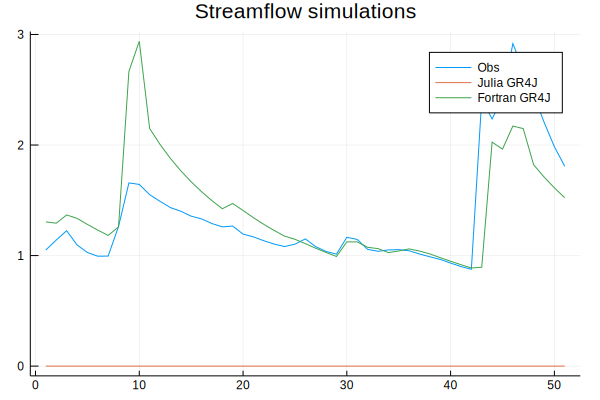

In [170]:
plot([d.obs_runoff, d.runoff_sim, d.obs_runoff_sim_0], title="Streamflow simulations", 
    labels=["Obs", "Julia GR4J", "Fortran GR4J"])